In [1]:
import tqdm
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
T = transforms.Compose(
    [
     transforms.Resize((224, 224)),
     transforms.ToTensor()
    ]
)
print(device)

net = models.squeezenet1_1(pretrained=True).to(device)
for param in net.parameters():
    param.requires_grad = False

def load_img(img):
    img = Image.open(img)
    img = T(img).unsqueeze(0).to(device)
    return img

cpu


In [3]:
def make_fooling_img(img, net, target, lr, n_iters):
    counter = 0
    fooling_img = img.clone()
    fooling_img = fooling_img.requires_grad_()
    for i in tqdm.trange(n_iters):
        out = net(fooling_img)
        pred = out.argmax(-1)
        if pred != target:
            out[:, target].backward()
            grad = lr * fooling_img.grad.data / fooling_img.grad.data.norm()
            fooling_img.data += grad.data
            fooling_img.grad.data.zero_()
        else:
            print('')
            print('pred == target!!')
            counter += 1
            if counter == 5:
                break
    return fooling_img

def plot_imgs_n_diff(img, fooling_img):
    out = net(fooling_img)
    diff = fooling_img - img
    print(f'prediction: {out.argmax(-1).item()}')

    plt.subplot(1, 3, 1)
    plt.title('original img')
    plt.imshow(img[0].permute(1, 2, 0))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('fooling img')
    plt.imshow(fooling_img[0].permute(1, 2, 0).detach())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('difference')
    plt.imshow(25 * diff[0].permute(1, 2, 0).detach())
    plt.axis('off')

    plt.gcf().set_size_inches(12, 5)
    plt.show()

tensor([610])


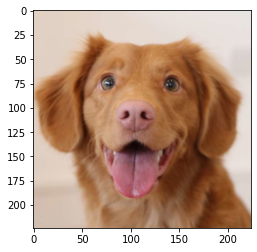

In [4]:
img = load_img('dog.jpg')
plt.imshow(img[0].permute(1, 2, 0))
out = net(img)
print(out.argmax(1))

  7%|▋         | 7/100 [00:00<00:05, 15.95it/s]


pred == target!!

pred == target!!

pred == target!!

pred == target!!

pred == target!!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction: 42


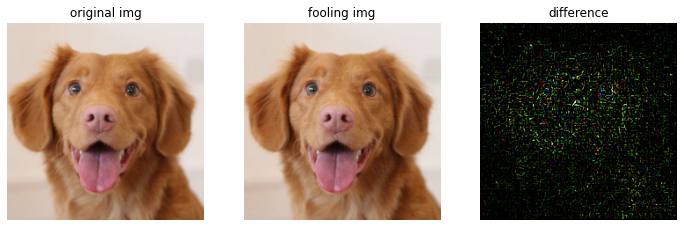

In [5]:
fooling_img = make_fooling_img(img, net, target=42, lr=1, n_iters=100)
plot_imgs_n_diff(img, fooling_img)

tensor([132])


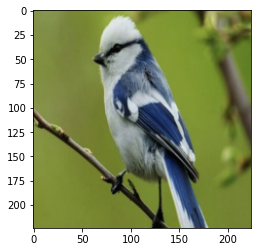

In [6]:
img1 = load_img('bird.jpg')
plt.imshow(img1[0].permute(1, 2, 0))
out = net(img1)
print(out.argmax(1))

  7%|▋         | 7/100 [00:00<00:06, 13.99it/s]


pred == target!!

pred == target!!

pred == target!!

pred == target!!

pred == target!!
prediction: 42



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


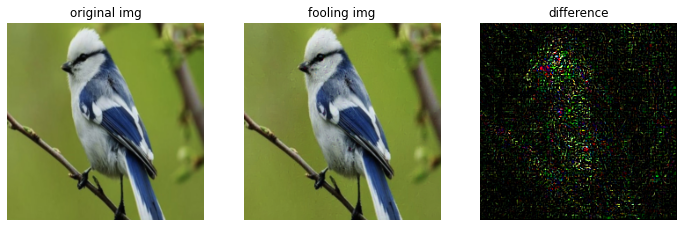

In [7]:
fooling_img1 = make_fooling_img(img1, net, target=42, lr=1, n_iters=100)
plot_imgs_n_diff(img1, fooling_img1)